In [2]:
import cv2 as cv
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
img = cv.imread("x_ray.png",cv.COLOR_BGR2GRAY)

plt.imshow(img, "Greys")
plt.show()

In [ ]:

#img_T = cv.adaptiveThreshold(img, 1, cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY, 7, 6 )
ret, thresh = cv.threshold(img,1,90,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
print("threshold: ",ret)
plt.imshow(thresh,"Greys")
plt.show()
#cv.adaptiveThreshold(img,100,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,5)

In [ ]:
#Encontra contornos dos objetos na imagem


#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edged = cv.Canny(thresh, 30, 200)

contours, hierarchy = cv.findContours(edged,
    cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.imshow('Canny Edges After Contouring', edged)


print("Number of Contours found = " + str(len(contours)))
cv.drawContours(img, contours, -1, (0, 255, 0), 3)

cv.imshow('Contours', img)
cv.waitKey(0)
cv.destroyAllWindows()

# FIND PATTERN

In [ ]:
img_2 = cv.imread("9144384_1.png",cv.COLOR_BGR2GRAY)
plt.imshow(img_2, "Greys")
plt.show()

In [ ]:
ret, thresh_2 = cv.threshold(img_2,1,90,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
print("threshold: ",ret)
plt.imshow(thresh_2,"Greys")
plt.show()

In [16]:
img = cv.imread("test.png",0)
edged_img = cv.Canny(img, 30, 200)

img2 = img.copy()
template = cv.imread("cropped.png",0)
edged_template = cv.Canny(template,30, 200)

cv.imshow("edged image", edged_img)
cv.imshow("edged template image", edged_template)
cv.waitKey(0)
cv.destroyAllWindows()

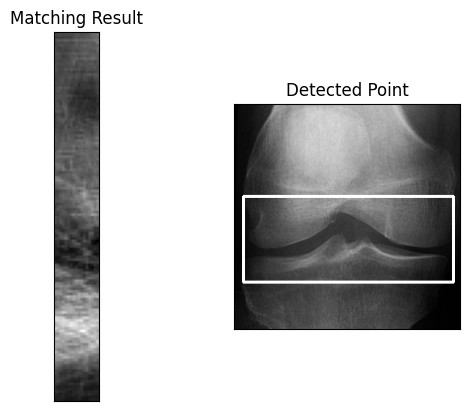

In [8]:
img = cv.imread("../9116147_1.png",0)
edged_img = cv.Canny(img, 30, 200)
img2 = img.copy()
template_l = cv.imread("../templates/template_L.png",0)
template_r = cv.imread("../templates/template_R.png",0)

edged_template_l = cv.Canny(template_l,30, 200)
edged_template_r = cv.Canny(template_r,30, 200)

img = img2.copy()

w_l, h_l = template_l.shape[::-1]
w_r, h_r = template_l.shape[::-1]

method = cv.TM_CCOEFF


# Apply template Matching
res_l = cv.matchTemplate(edged_img,edged_template_l, method)
res_r = cv.matchTemplate(edged_img,edged_template_r, method)
min_val_l, max_val_l, min_loc_l, max_loc_l = cv.minMaxLoc(res_l)
min_val_r, max_val_r, min_loc_r, max_loc_r = cv.minMaxLoc(res_r)
if max_val_r > max_val_l:
    top_left = max_loc_r
    bottom_right = (top_left[0] + w_r, top_left[1] + h_r)
else:
    top_left = max_loc_l
    bottom_right = (top_left[0] + w_l, top_left[1] + h_l)

cv.rectangle(img,top_left, bottom_right, 255, 2)
plt.subplot(121),plt.imshow(res_l,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.show()